# Library Imports

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Dataset Overview

In [3]:
file_path = '/kaggle/input/climate-change-impact-on-agriculture/climate_change_impact_on_agriculture_2024.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [5]:
data["Region"].unique()

array(['West Bengal', 'North', 'Ile-de-France', 'Prairies', 'Tamil Nadu',
       'Midwest', 'Northeast', 'New South Wales', 'Punjab', 'North West',
       'South East', 'Grand Est', 'Northwestern', 'Siberian', 'Northwest',
       'Victoria', 'Nouvelle-Aquitaine', 'South', 'Quebec', 'Southeast',
       'Ontario', 'East', 'Pampas', 'Western Australia', 'Volga',
       'Maharashtra', 'Provence-Alpes-Cote d’Azur', 'West', 'Central',
       'North Central', 'Patagonia', 'Queensland', 'South West',
       'British Columbia'], dtype=object)

In [6]:
data.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


# Exploratory Analysis

In [7]:
data["Region"].unique()

array(['West Bengal', 'North', 'Ile-de-France', 'Prairies', 'Tamil Nadu',
       'Midwest', 'Northeast', 'New South Wales', 'Punjab', 'North West',
       'South East', 'Grand Est', 'Northwestern', 'Siberian', 'Northwest',
       'Victoria', 'Nouvelle-Aquitaine', 'South', 'Quebec', 'Southeast',
       'Ontario', 'East', 'Pampas', 'Western Australia', 'Volga',
       'Maharashtra', 'Provence-Alpes-Cote d’Azur', 'West', 'Central',
       'North Central', 'Patagonia', 'Queensland', 'South West',
       'British Columbia'], dtype=object)

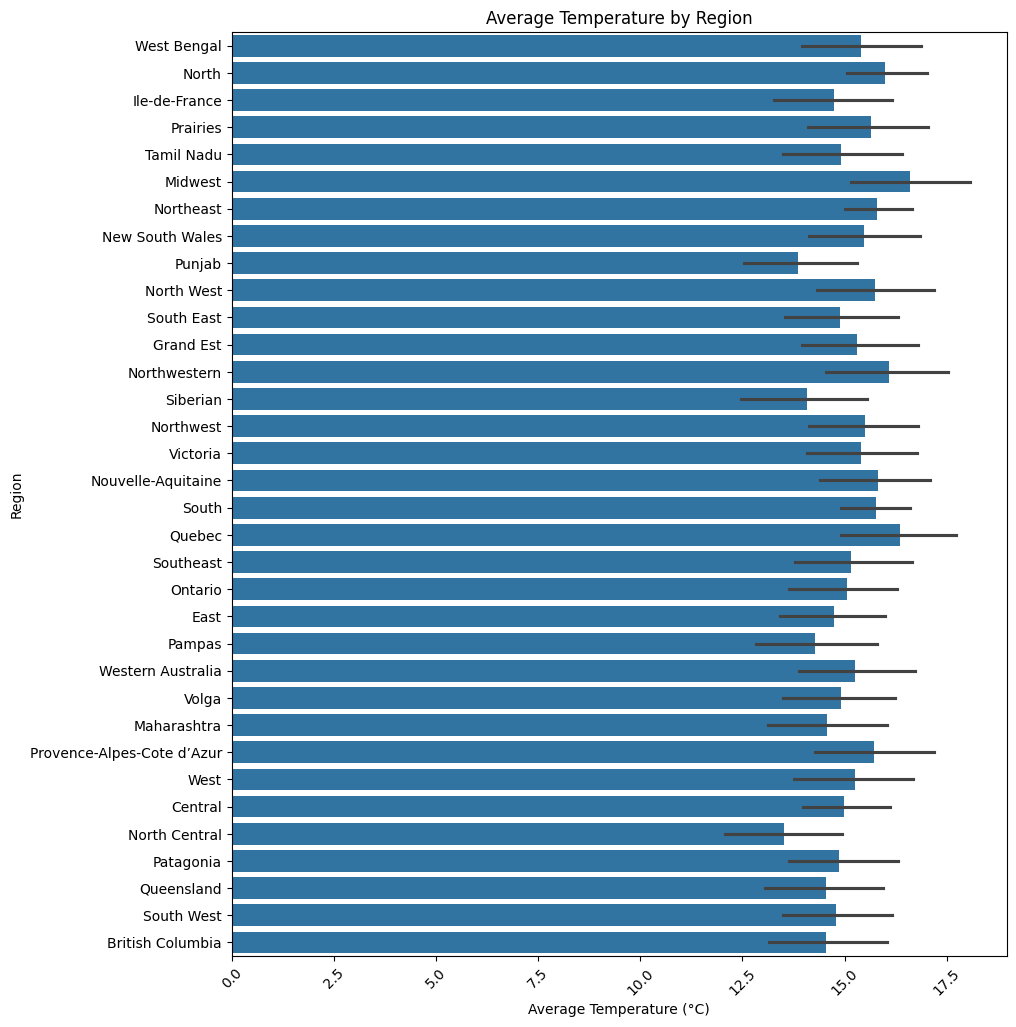

In [8]:
plt.figure(figsize=(10, 12))
sns.barplot(y='Region', x='Average_Temperature_C', data=data, estimator='mean')
plt.title('Average Temperature by Region')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()

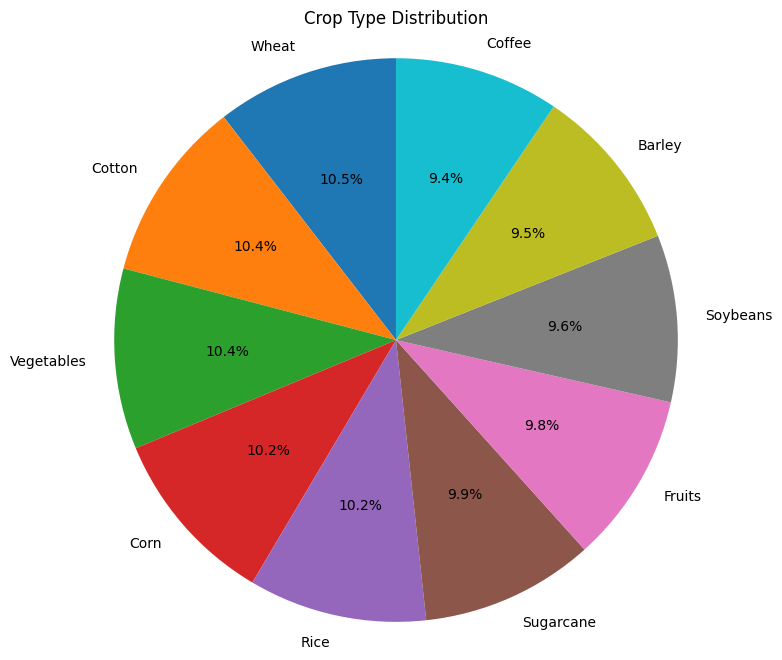

In [10]:
crop_counts = data["Crop_Type"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Crop Type Distribution")
plt.axis("equal")  # Makes it a perfect circle
plt.show()

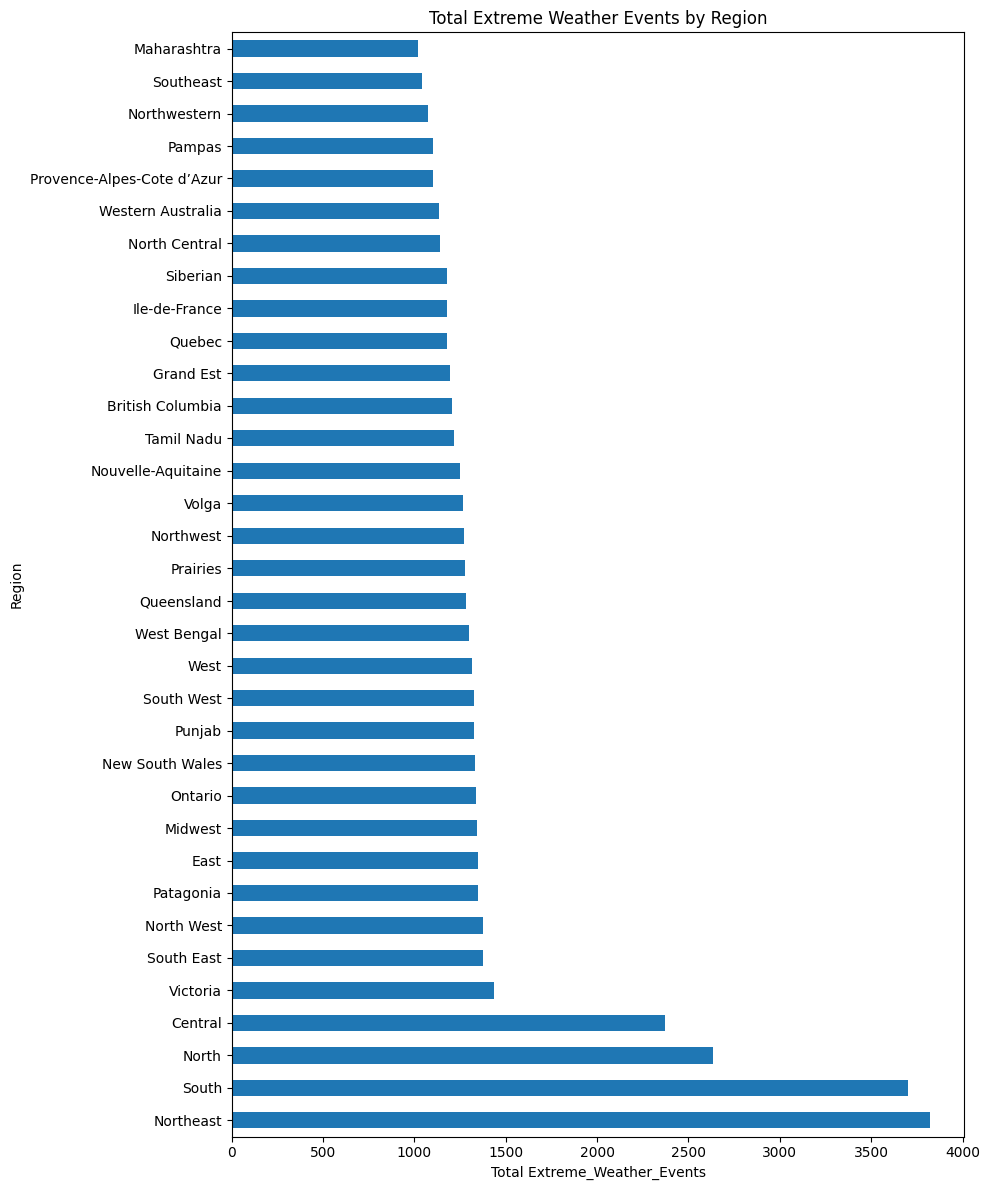

In [17]:
weather_sum_by_region = data.groupby("Region")["Extreme_Weather_Events"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 12))
weather_sum_by_region.plot(kind="barh")

plt.title("Total Extreme Weather Events by Region")
plt.xlabel("Total Extreme_Weather_Events")
plt.ylabel("Region")
plt.tight_layout()
plt.show()